Dieser Block ist ein "Mardown" Block. Dies lässt sich in der Menüleiste einstellen.<br>
Mittels *Markdown* lassen sich **formatierte Notizen** erstellen. [Weitere Informationen](https://de.wikipedia.org/wiki/Markdown#Auszeichnungsbeispiele "Artikel von Wikipedia")
___
#### Zunächst müssen wir wieder die verwenden Pakete laden
* sympy und numpy werden geladen
* Vom sympy.plotting wird plot um den Schreibaufwand zu reduzieren  
* Die letzten beiden Zeilen sorgen dafür das alle Ergebnisse einer Zelle angezeigt werden und nicht nur das letzte Ergebnis.


In [1]:
import sympy as sp
import numpy as np
from sympy.plotting import plot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Zunächste müssen wir die verwendeten Symbole t, s und a definieren<br>
Aufbauend auf diesen Symbolen lässt sich dann zum Beispiel die Funktion \$ f=\sqrt{e^{-at}}\cdot \sigma(t)$ definieren


In [2]:
t, s = sp.symbols('t, s')
a = sp.symbols('a', real=True, positive=True)
f = sp.sqrt(sp.exp(-a*t))*sp.Heaviside(t)
f

sqrt(exp(-a*t))*Heaviside(t)

Mittels **subs** lassen sich Variablen durch Zahlen ersetzen

In [4]:
g=f.subs({a:2})
g
f.subs({a:2,t:1})

sqrt(exp(-2*t))*Heaviside(t)

exp(-1)

**lambdify** ermöglich es symbolische in numerische Funktionen umzuwandeln. Im Beispiel wird die numerische Funktion h erzeugt und dann für die t-Werte 0 bis 9 berechnet. a wurde dabei fest auf 1 gesetzt.

In [5]:
h = sp.lambdify((t,a), f, "numpy")
h(np.arange(12),2)

array([5.00000000e-01, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
       3.35462628e-04, 1.23409804e-04, 4.53999298e-05, 1.67017008e-05])

sympy besitzt auch Funktion um Graphen zu erzeugen. <br>
Wieso kann damit für f und h kein Graph erstellt werden?

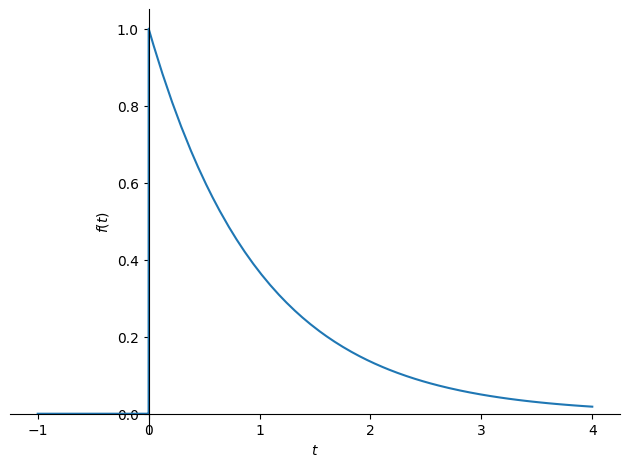

In [6]:
plot(g, (t, -1, 4))

Kommen wir jetz wieder zu den zentralen Aufgaben. Laplace und inverse Laplace Transformation werden in folgenden Beispiel verwendet um eine Rampenantwort zu bestimmen.

s**(-2)

(3*(t - 1)*exp(t/2) + 2*sqrt(3)*cos(sqrt(3)*t/2 + pi/6))*exp(-t/2)*Heaviside(t)/3

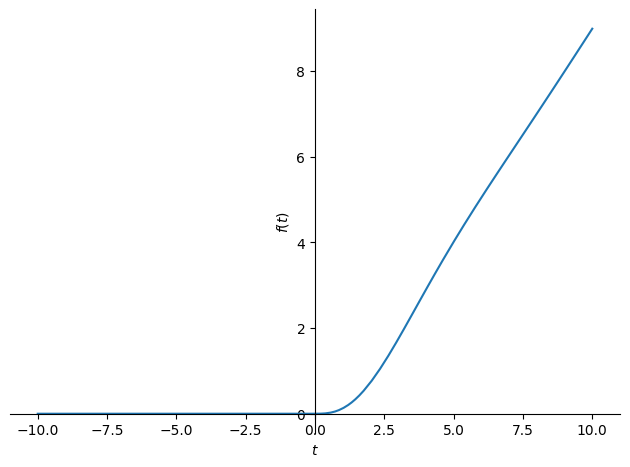

In [7]:
f = t*sp.Heaviside(t)
F=sp.laplace_transform(f, t, s, noconds=True)
F
G=1/(s**2+1*s+1)
h=sp.inverse_laplace_transform(F*G, s, t)
h
plot(h)